# Study of markers in breast tissues

In [19]:
import scSherlock as sh
import scanpy as sc

In [14]:
adata = sc.read_h5ad('/home/croizer/data/HBCA_reed_2024.h5ad')
cell_type_column = "author_cell_type"
patient_column = "donor_id"


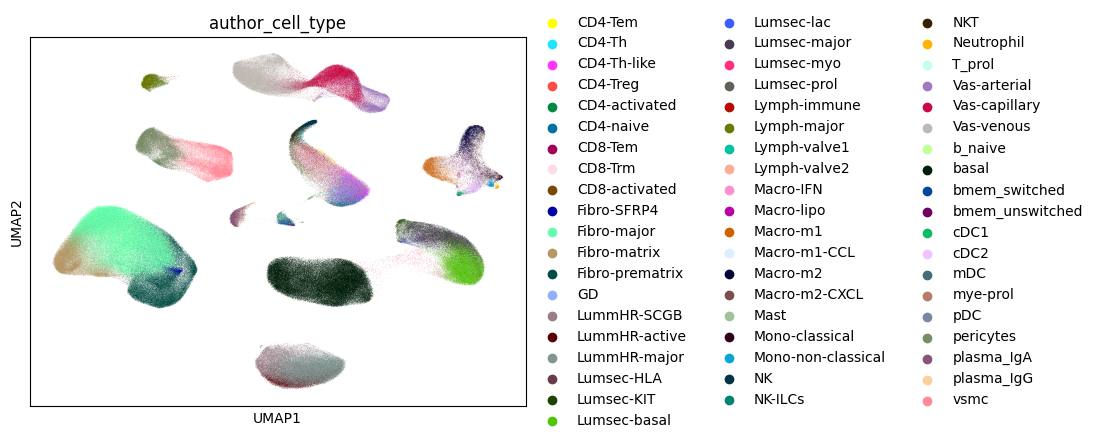

In [15]:
sc.pl.umap(adata, color="author_cell_type")

In [16]:
import scSherlock.scSherlock.scSherlock as sh

In [17]:
# Create configuration
config = sh.ScSherlockConfig(
    k_values=[1, 10, 25],
    scoring_method=sh.ScoringMethod.DIFF,
    aggregation_method=sh.AggregationMethod.MEAN,
    max_genes_kept=100,
    min_patients=3,
    min_reads=10,
    sparse_step=20,
    n_jobs=5
)

# Initialize SCherlock
scherlock = sh.ScSherlock(
    adata=adata,
    column_ctype=cell_type_column,
    column_patient=patient_column,
    config=config
)



2025-03-25 17:09:15,173 - ScSherlock - INFO - Pre-filtering genes...
2025-03-25 17:09:15,176 - ScSherlock - INFO - Original dataset: 714331 cells, 33145 genes
2025-03-25 17:09:47,620 - ScSherlock - INFO - Filtered dataset: 714331 cells, 28016 genes
2025-03-25 17:09:47,622 - ScSherlock - INFO - Removed 5129 genes with low expression
2025-03-25 17:09:47,625 - ScSherlock - INFO - ScSherlock initialized with 58 cell types and (714331, 28016) data matrix


In [18]:
# Run the algorithm
top_markers = scherlock.run(method="theoric")
#top_markers = scherlock.run(method="empiric")


2025-03-25 17:09:47,834 - ScSherlock - INFO - Calculating theoretical scores...
Aggregating Samples: 100%|████████████████████████| 7308/7308 [00:02<00:00, 3213.20it/s]
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:498: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype, self.column_patient]).size()
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:506: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (n_cells.drop(ctype).groupby(level=self.column_patient).sum())).median()
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.p

{'LummHR-SCGB':                    1   10            25    aggregated  exp_prop
ENSG00000145451  1.0  1.0  1.000000e+00  1.000000e+00  0.000021
ENSG00000121270  1.0  1.0  1.000000e+00  1.000000e+00  0.000009
ENSG00000268751  1.0  1.0  1.000000e+00  1.000000e+00  0.000009
ENSG00000170099  1.0  1.0  1.000000e+00  1.000000e+00  0.000004
ENSG00000213759  1.0  1.0  1.000000e+00  1.000000e+00  0.000003
...              ...  ...           ...           ...       ...
ENSG00000198668  0.0  0.0 -1.825986e-15 -6.086621e-16  0.000412
ENSG00000204592  0.0  0.0 -2.097417e-15 -6.991390e-16  0.000324
ENSG00000146278  0.0  0.0 -4.057699e-15 -1.352566e-15  0.000308
ENSG00000100097  0.0  0.0 -1.913121e-14 -6.377071e-15  0.000137
ENSG00000026025  0.0  0.0 -2.936871e-06 -9.789569e-07  0.000129

[28016 rows x 5 columns], 'LummHR-major':                    1   10            25    aggregated  exp_prop
ENSG00000145113  1.0  1.0  1.000000e+00  1.000000e+00  0.000011
ENSG00000170743  1.0  1.0  1.000000e+00  1.00

In [9]:
adata.var_names = adata.var['feature_name']

/home/croizer/.conda/envs/scsherlock/lib/python3.13/site-packages/anndata/_core/anndata.py:845: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['MIR1302-2HG', 'FAM138A', 'OR4F5', 'ENSG00000238009.6', 'ENSG00000239945.1']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


2025-03-25 15:23:46,134 - ScSherlock - INFO - Plotting 58 genes for 58 cell types using theoric model


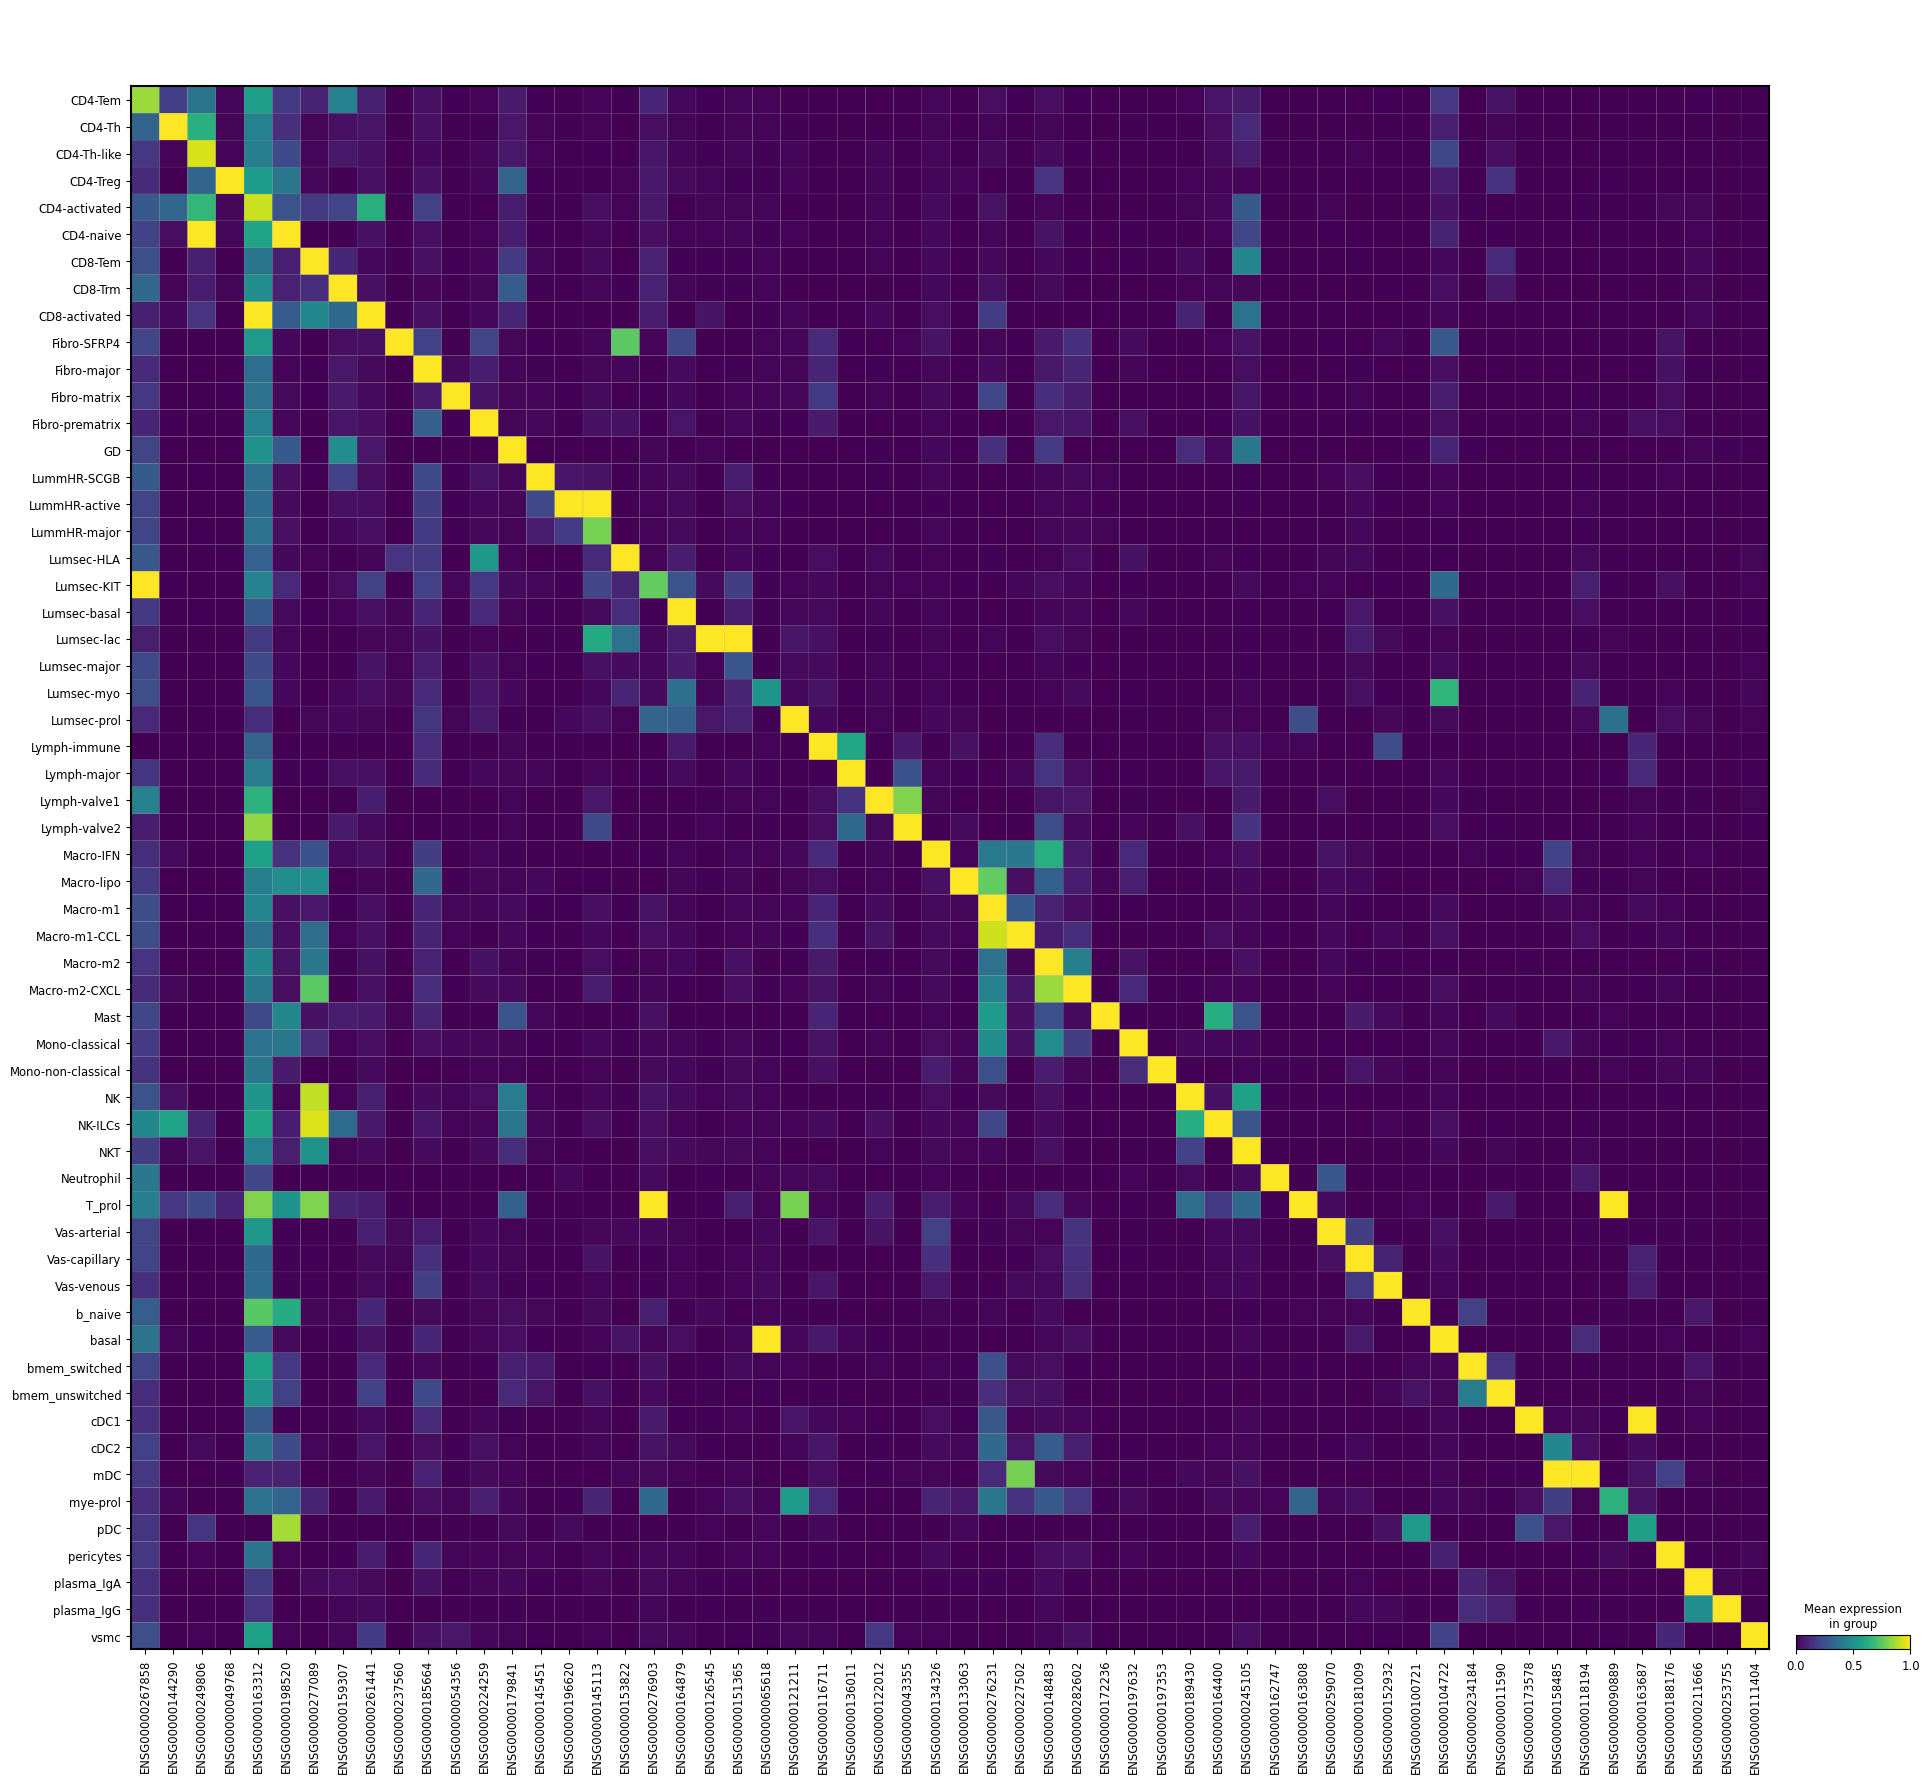

In [10]:
scherlock.plot_marker_heatmap(n_genes=1)

In [11]:
top_markers = scherlock.run(method="empiric")

2025-03-25 15:23:49,769 - ScSherlock - INFO - Calculating theoretical scores...


Aggregating Samples: 100%|████████████████████████| 7308/7308 [00:02<00:00, 3221.58it/s]
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:498: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_cells = self.adata.obs.groupby(by=[self.column_ctype, self.column_patient]).size()
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:506: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (n_cells.drop(ctype).groupby(level=self.column_patient).sum())).median()
/home/croizer/scSherlock/scSherlock/scSherlock/sherlock_obj.py:506: FutureWarning: The default of observed=False is deprecated and will be ch

{'LummHR-SCGB':                         1        10        25  aggregated  exp_prop
ENSG00000186160  0.787563  0.812785  0.739448    0.779932  0.000028
ENSG00000170099  0.771379  0.770270  0.758001    0.766550  0.000004
ENSG00000145451  0.736692  0.743482  0.697011    0.725728  0.000021
ENSG00000134240  0.777235  0.744526  0.643403    0.721721  0.000066
ENSG00000268751  0.784249  0.658346  0.599047    0.680547  0.000009
...                   ...       ...       ...         ...       ...
ENSG00000203288  0.096571  0.068722  0.067218    0.077504  0.000001
ENSG00000223478  0.074599  0.072670  0.070139    0.072469  0.000011
ENSG00000184381  0.090120  0.060414  0.057585    0.069373  0.000006
ENSG00000171792  0.059574  0.060476  0.051794    0.057281  0.000011
ENSG00000277369  0.047224  0.048976  0.042739    0.046313  0.000001

[100 rows x 5 columns], 'LummHR-major':                         1        10        25  aggregated  exp_prop
ENSG00000250423  0.575198  0.566197  0.545216    0.562204  

2025-03-25 15:53:54,772 - ScSherlock - INFO - Plotting 52 genes for 52 cell types using empiric model


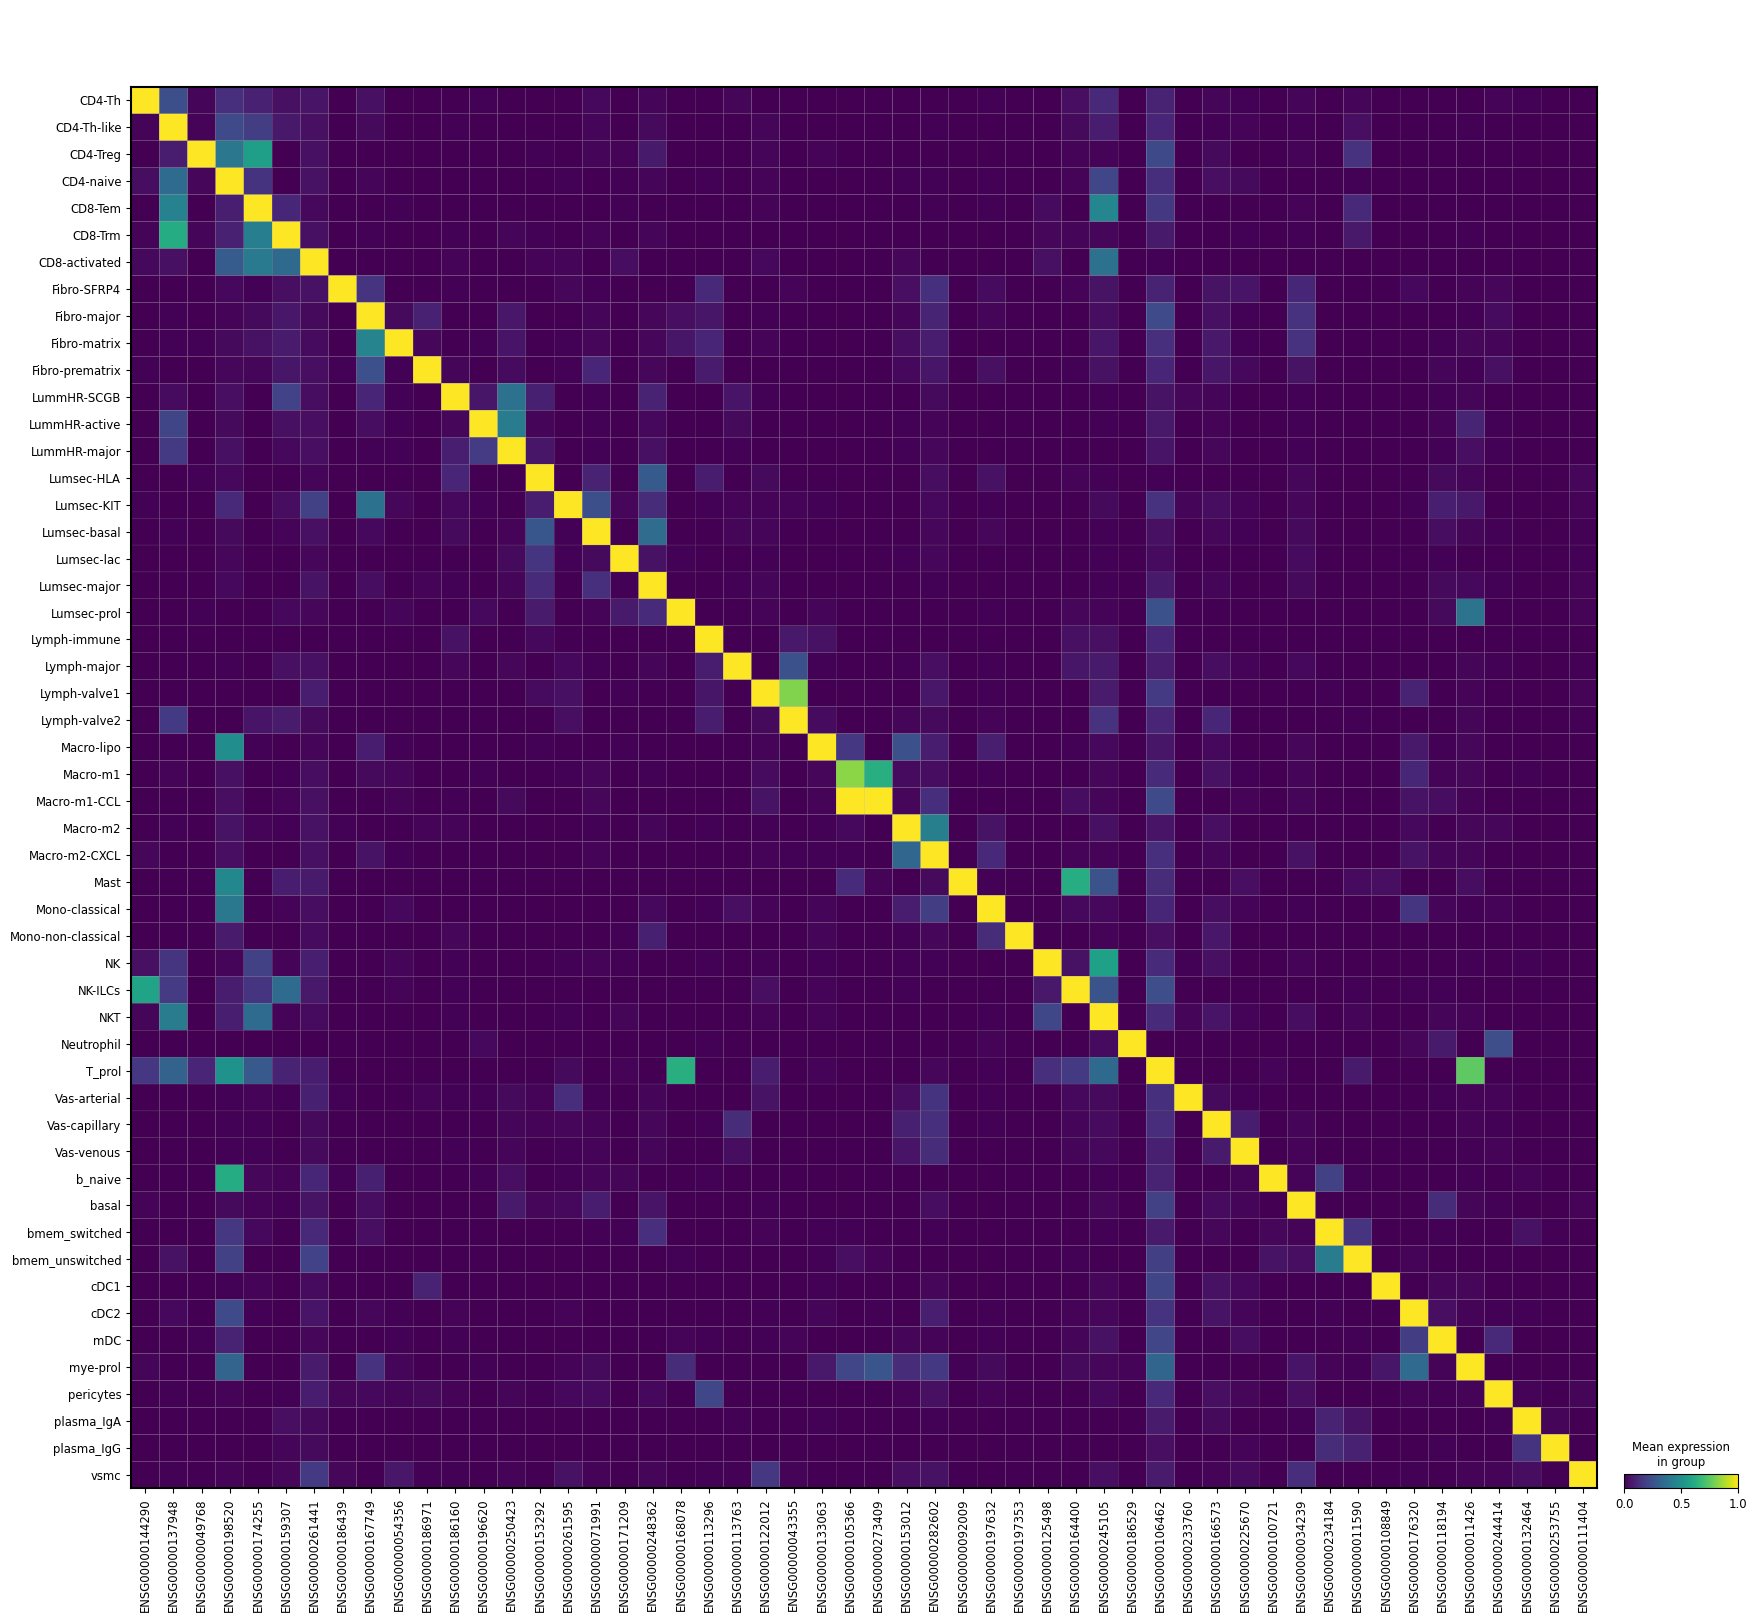

In [12]:
scherlock.plot_marker_heatmap(n_genes=1)